In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 16

# Make your own visualization of the gender gap

If you have a csv file of employee genders, salaries, and some control factor (i.e. job title), you can make your own version of the plots shown on our page. We'll recreate the UC professor analysis to show how.

First, we'll read the dataset into a pandas DataFrame object.

In [69]:
profs = pd.read_csv('final_uc_professors.csv')
profs.head()

,Unnamed: 0,ordered_name,Job Title,Total Pay & Benefits,department,gender
0,0,Daryl Cooper,PROF-AY,172467.0,Mathematics,male
1,3,Jon Sonstelie,PROF-AY-B/E/E,91278.0,Economics,male
2,5,Eric Potma,PROF-AY,141453.0,Chemistry,male
3,7,Martha Olney,ADJ PROF-AY-B/E/E,137781.0,Economics,female
4,10,Casey Walsh,ASSOC PROF-AY,117819.0,Anthropology,male


In [71]:
def aggregate_salaries(data, control, gender_col_name='gender',
                       salary_col_name='Total Pay & Benefits', count_cut=10):
    """
    Gather the aggregate statistics in the data split by gender.
    Control variables that occur less than `count_cut` times are ignored.
    """
    all_cat_data = {}
    counts = data[control].value_counts()
    for cat in data[control].unique():
        if not isinstance(cat, str):
            continue
        if counts[cat] < count_cut:
            continue
        cat_data = {}
        cat_data['mean_female'] = data[(data[gender_col_name]=='female') & (data[control]==cat)].mean()[salary_col_name]
        cat_data['mean_male'] = data[(data[gender_col_name]=='male') & (data[control]==cat)].mean()[salary_col_name]
        cat_data['mean'] = data[(data[gender_col_name]!='') & (data[control]==cat)].mean()[salary_col_name]
        cat_data['median_female'] = data[(data[gender_col_name]=='female') & (data[control]==cat)].median()[salary_col_name]
        cat_data['median_male'] = data[(data[gender_col_name]=='male') & (data[control]==cat)].median()[salary_col_name]
        cat_data['median'] = data[(data[gender_col_name]!='') & (data[control]==cat)].median()[salary_col_name]
        all_cat_data[cat] = cat_data
    df = pd.DataFrame.from_dict(all_cat_data).T
    return df

In [72]:
def gender_gap_vis(data, control, gender_col_name='gender',
                   salary_col_name='Total Pay & Benefits', count_cut=10):
    """
    Make the gender gap visualization.
    """
    plt.figure(figsize=(18, 12))
    df = aggregate_salaries(data, control, gender_col_name, salary_col_name, count_cut)
    for i, kv in enumerate(df.sort_values('median').iterrows()):
        if i == 0:
            plt.plot([i, i], [kv[1]['median']/1000., kv[1]['median_male']/1000.], 'C0', linewidth=3, label='male')
            plt.plot([i, i], [kv[1]['median']/1000., kv[1]['median_female']/1000.], 'C3', linewidth=3, label='female')
            plt.scatter(i, kv[1]['median']/1000., c='k', zorder=100, label='overall')
        else:
            plt.plot([i, i], [kv[1]['median']/1000., kv[1]['median_male']/1000.], 'C0', linewidth=3)
            plt.plot([i, i], [kv[1]['median']/1000., kv[1]['median_female']/1000.], 'C3', linewidth=3)
            plt.scatter(i, kv[1]['median']/1000., c='k', zorder=100)
        plt.scatter(i, kv[1]['median_male']/1000., c='C0', zorder=100)
        plt.scatter(i, kv[1]['median_female']/1000., c='C3', zorder=100)
    plt.gca().set_xticks(range(len(df.index.values)));
    plt.gca().set_xticklabels(df.sort_values('median').index.values);
    plt.xticks(rotation=90)
    plt.legend()
    plt.ylabel('Median {} (Thousands of $)'.format(salary_col_name))

Here are the results split by department.

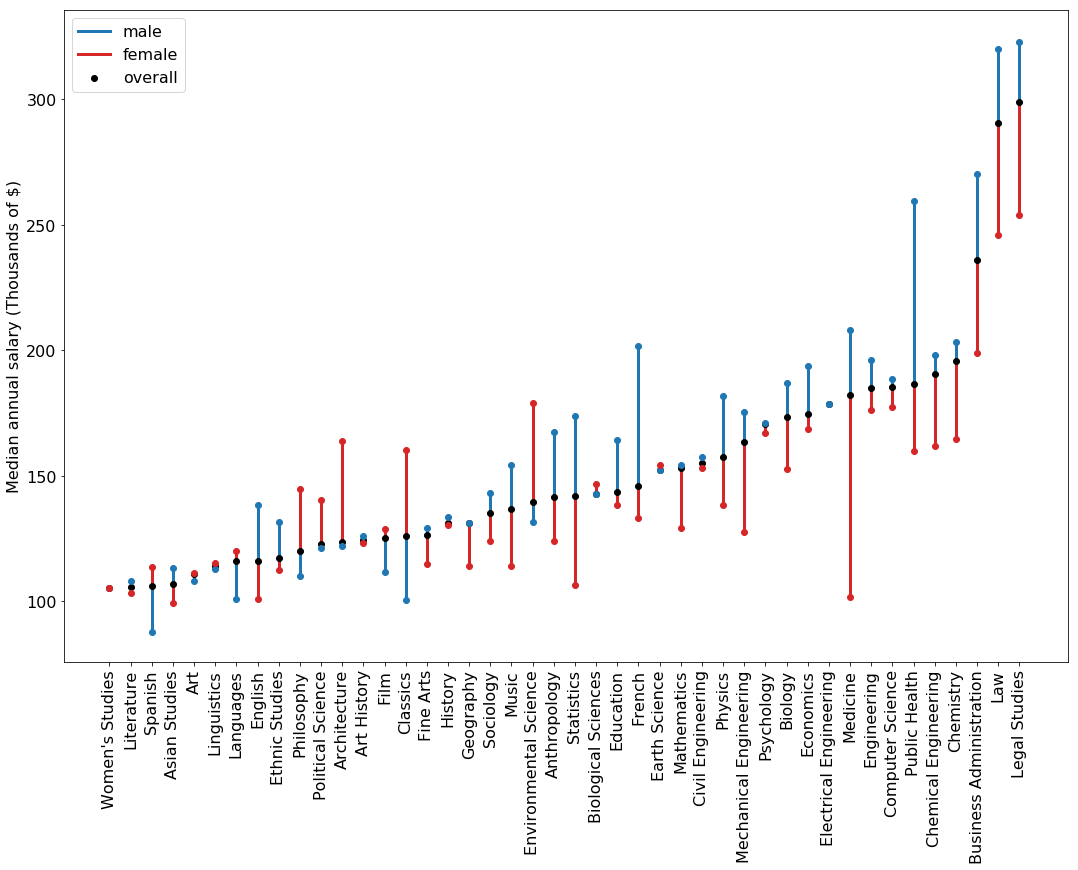

In [58]:
gender_gap_vis(profs, 'department')

Or by job title in the UC system.

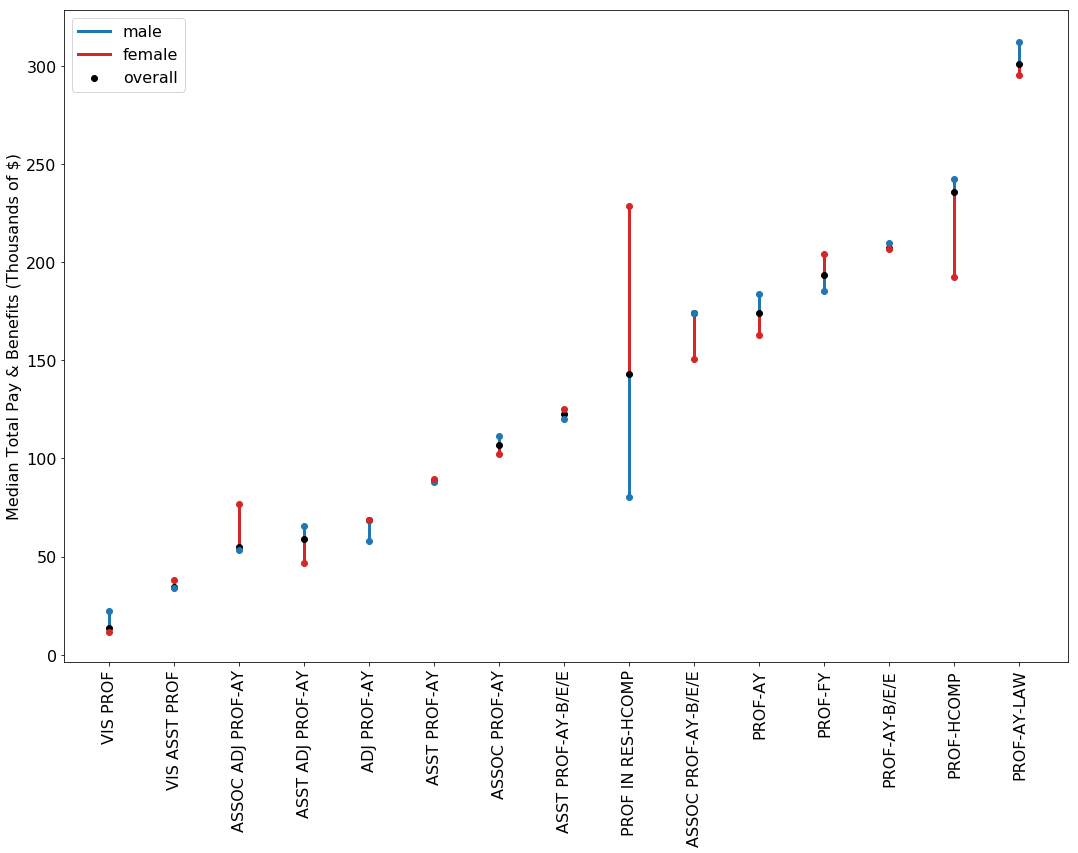

In [73]:
gender_gap_vis(profs, 'Job Title', count_cut=5)

We also took a look at the State of California government employees dataset and compared bonuses instead of salaries

In [75]:
cal = pd.read_csv('state-of-california-2016_gender.csv', encoding='latin1')

/Users/samdixon/miniconda/envs/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [76]:
cal['Other Pay'] = cal['Other Pay'].replace('Not Provided', 0)
cal['Other Pay'] = cal['Other Pay'].astype(float)

(0, 7)

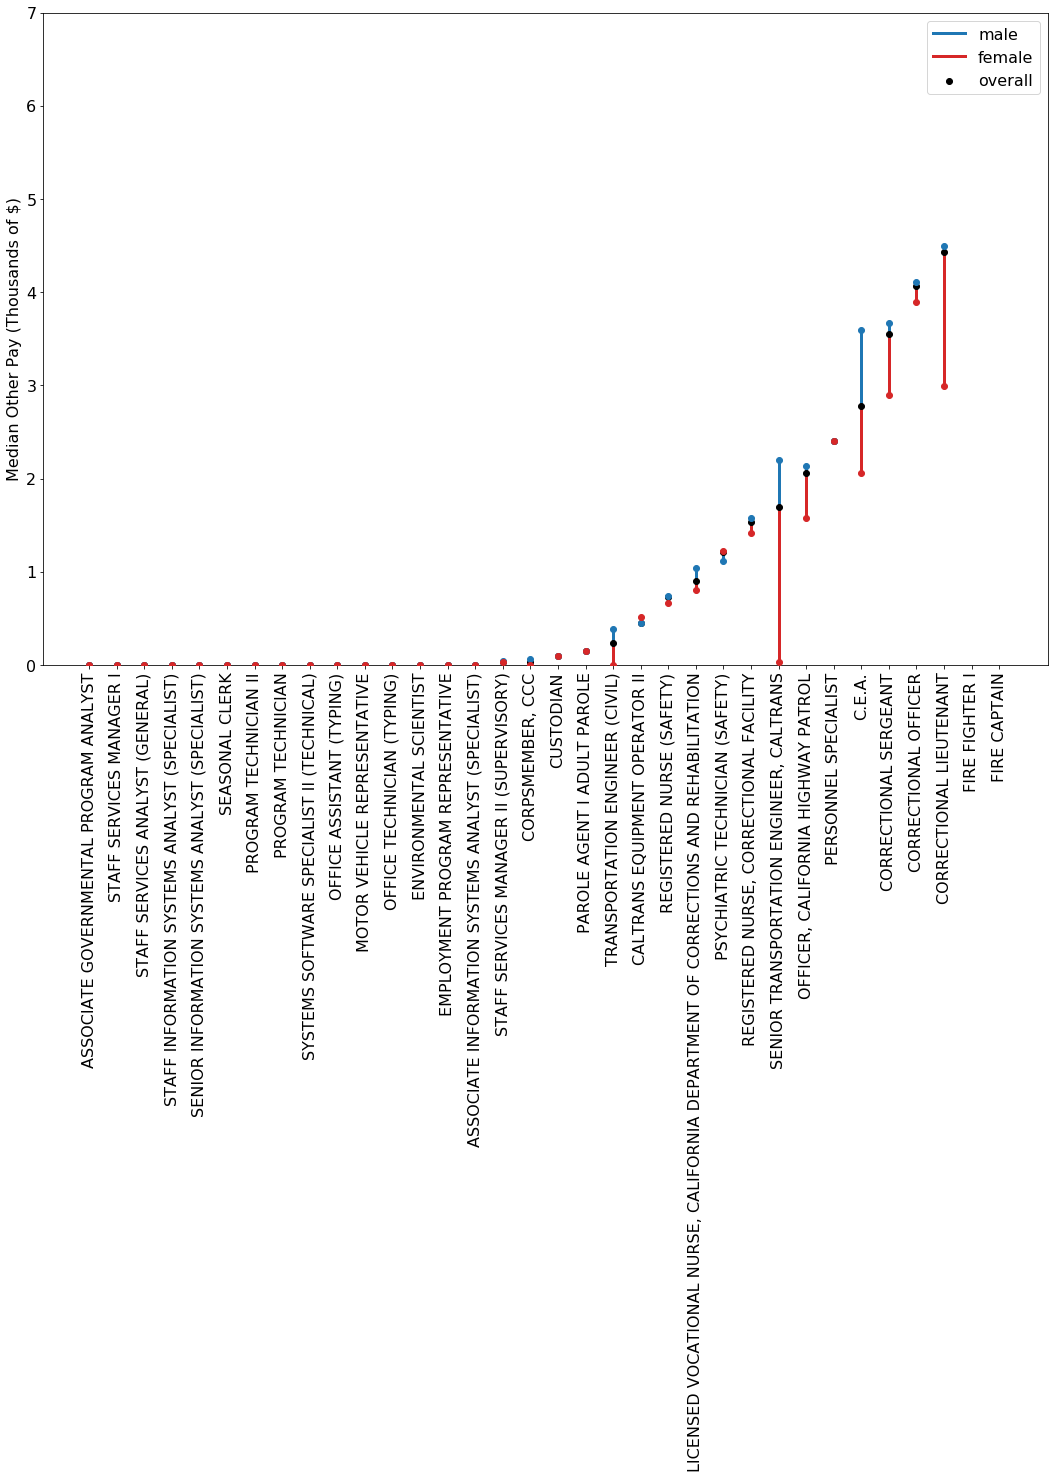

In [77]:
gender_gap_vis(cal, 'Job Title', salary_col_name='Other Pay', count_cut=1000)
plt.ylim(0, 7)

# Don't have the genders of employees in your data set?

No problem. If you have the first names, we can look up the probable gender of the employee in question using a dictionary of first name-gender pairs based on US Census records. NB: this method uses only the ~5000 most popular first names, so this may encode some bias in the subsequent analysis.

In [78]:
from gender import gender

In [ ]:
df['gender'] = [gender[name.split()[0].upper()] for name in df['names']]